In [2]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
import random
import seaborn as sns
from sklearn.model_selection import train_test_split

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
ctg=['glass','metal','organic','paper','plastic','trash']
data='C:/Users/aidan/Desktop/Garbage classification'

In [ ]:
data_x=[]
data_y=[]
data=[]
IMG_SIZE = 64

for category in categories:
    path=os.path.join(data,ctg)
    class_num=ctg.index(ctg)
    
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        data_x.append(new_array)
        data_y.append(class_num)

In [ ]:
temp = list(zip(data_x,data_y)) 
random.shuffle(temp) 
X,y = zip(*temp) 

In [ ]:
X=np.asarray(X,dtype=None)
y=np.asarray(y,dtype=None)

In [ ]:
len(data_x)

4606

In [ ]:
len(data_y)

4606

In [ ]:
len(data)

0

In [ ]:
X.shape

(4606, 64, 64, 3)

In [ ]:
y.shape

(4606,)

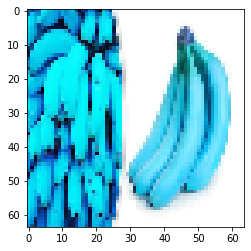

In [ ]:
plt.imshow(X[1])

In [ ]:
y[1]

2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=22)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=22)

In [ ]:
X_train[1].shape

(64, 64, 3)

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))
print(len(X_valid))
print(len(y_valid))

3730
3730
461
461
415
415


5


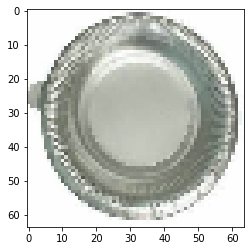

In [ ]:
i=1005
plt.imshow(X_train[i])
print(y_train[i])

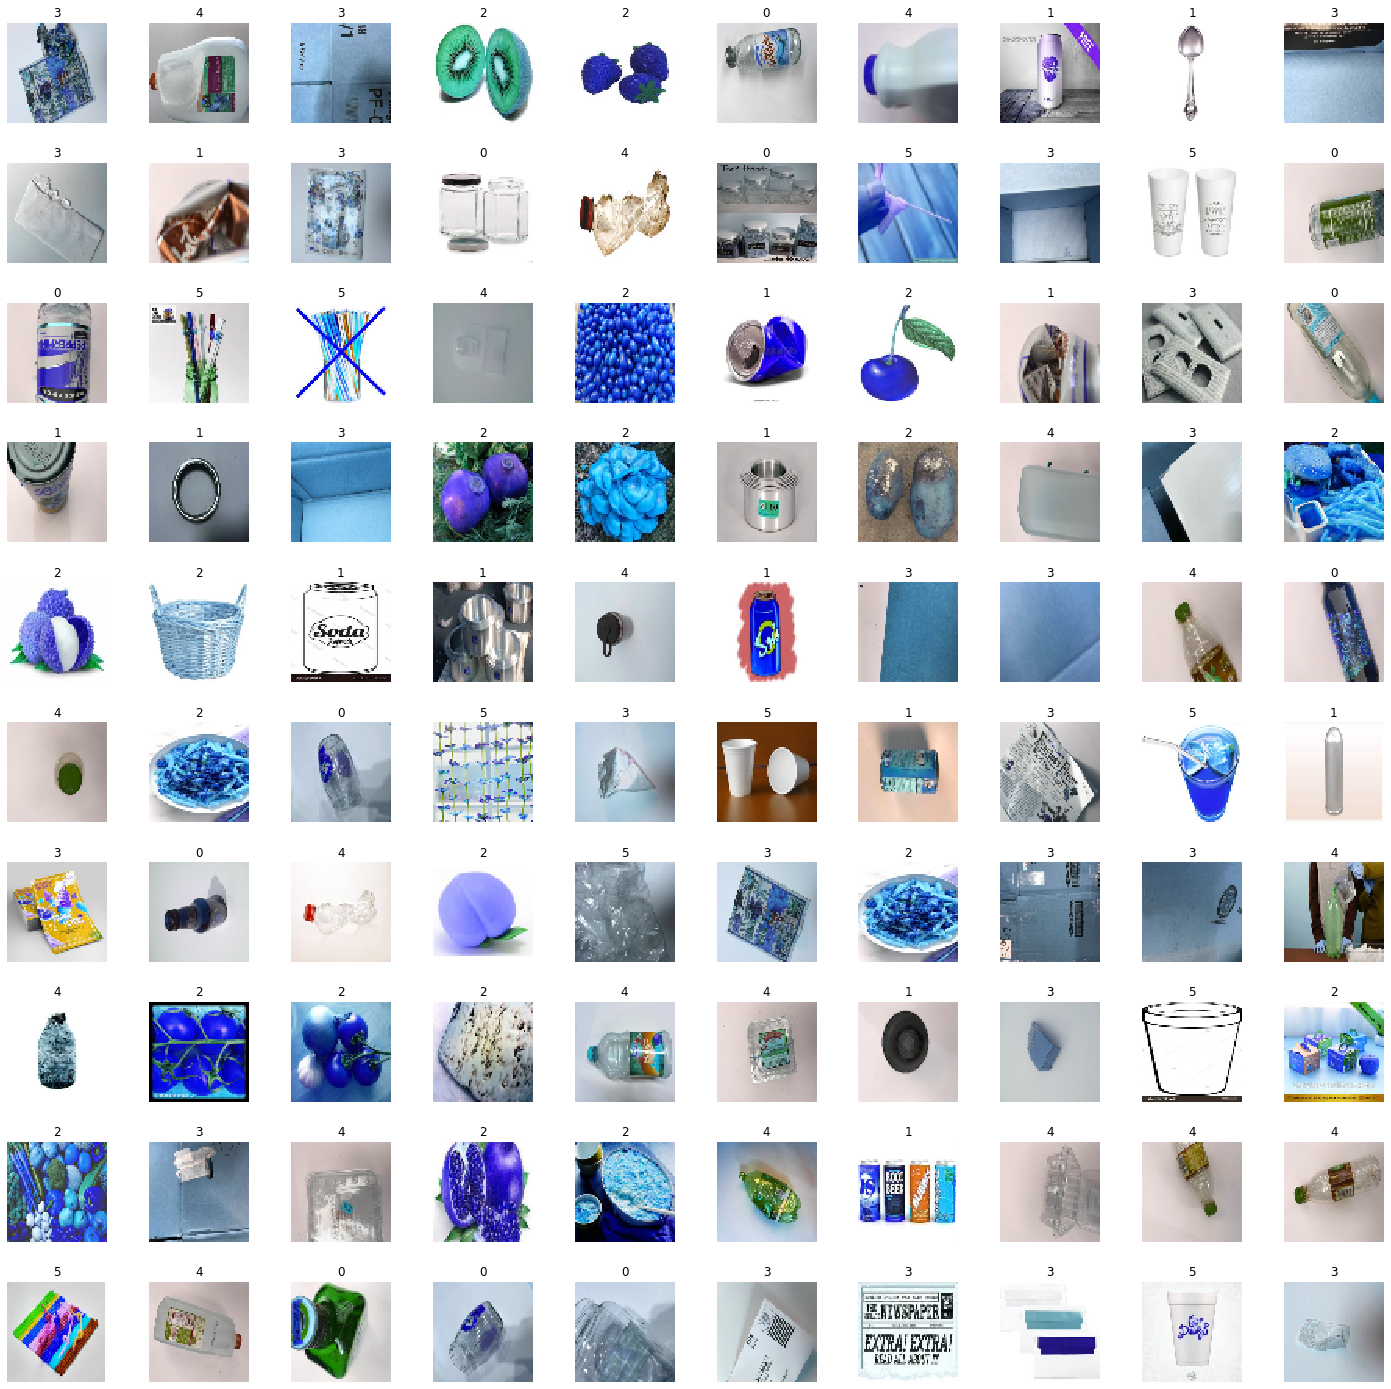

In [ ]:
W_grid=10
L_grid=10

fig,axes=plt.subplots(L_grid,W_grid,figsize=(25,25))
axes=axes.ravel()

n_training=len(X_train)

for i in np.arange(0,L_grid*W_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

In [ ]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_valid=X_valid.astype('float32')

In [ ]:
num_class=6

In [ ]:
y_train

array([2, 0, 0, ..., 4, 3, 0])

In [ ]:
y_test

array([1, 1, 3, 0, 1, 2, 1, 5, 1, 1, 0, 1, 2, 3, 5, 0, 1, 0, 1, 1, 1, 5,
       1, 2, 4, 0, 5, 5, 1, 5, 4, 1, 2, 3, 1, 4, 4, 2, 1, 0, 3, 3, 2, 1,
       4, 2, 1, 1, 2, 2, 3, 1, 1, 2, 0, 1, 3, 3, 5, 0, 4, 3, 2, 2, 2, 1,
       0, 3, 1, 2, 5, 3, 1, 0, 1, 2, 4, 1, 4, 3, 4, 1, 1, 2, 1, 0, 1, 5,
       4, 3, 4, 0, 2, 0, 1, 3, 0, 2, 2, 1, 1, 1, 3, 0, 0, 3, 1, 3, 2, 0,
       3, 4, 5, 1, 4, 3, 2, 2, 1, 2, 1, 3, 3, 3, 2, 2, 1, 1, 1, 3, 3, 5,
       2, 0, 4, 3, 4, 2, 3, 3, 3, 5, 0, 1, 1, 2, 1, 0, 2, 3, 2, 5, 3, 0,
       1, 3, 3, 3, 4, 0, 2, 1, 2, 3, 0, 0, 2, 3, 4, 0, 0, 2, 3, 3, 4, 2,
       0, 3, 3, 2, 4, 4, 4, 0, 5, 1, 1, 1, 3, 4, 0, 1, 4, 5, 5, 1, 2, 1,
       3, 5, 5, 2, 4, 2, 5, 3, 1, 1, 0, 5, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0,
       1, 2, 5, 3, 2, 0, 5, 3, 4, 2, 1, 2, 0, 1, 1, 3, 5, 1, 3, 2, 4, 1,
       5, 4, 3, 1, 5, 3, 5, 0, 3, 1, 3, 0, 4, 2, 5, 5, 3, 3, 4, 2, 4, 4,
       3, 2, 2, 3, 4, 3, 5, 0, 3, 1, 3, 1, 3, 1, 5, 3, 3, 1, 3, 2, 2, 0,
       0, 4, 2, 0, 4, 4, 5, 0, 1, 3, 4, 4, 5, 0, 3,

In [ ]:
y_valid

array([2, 4, 3, 1, 3, 2, 0, 4, 2, 4, 2, 3, 2, 3, 0, 4, 5, 2, 0, 0, 1, 3,
       4, 2, 1, 1, 4, 4, 4, 5, 4, 3, 1, 2, 0, 2, 5, 3, 2, 0, 0, 3, 5, 0,
       5, 4, 2, 1, 4, 3, 4, 0, 0, 3, 0, 1, 4, 0, 1, 1, 2, 2, 5, 4, 0, 4,
       2, 1, 4, 5, 5, 0, 4, 2, 2, 0, 2, 5, 3, 1, 1, 4, 1, 1, 1, 3, 0, 1,
       0, 5, 5, 5, 4, 4, 5, 2, 0, 5, 0, 5, 2, 1, 2, 5, 0, 5, 2, 1, 1, 3,
       1, 3, 5, 0, 3, 3, 3, 2, 5, 4, 2, 1, 2, 4, 2, 0, 5, 2, 3, 1, 4, 2,
       0, 3, 3, 3, 1, 4, 5, 0, 5, 0, 1, 3, 4, 3, 0, 3, 3, 2, 2, 3, 2, 3,
       4, 0, 1, 3, 1, 1, 2, 1, 2, 1, 1, 4, 3, 4, 1, 0, 2, 5, 5, 5, 3, 1,
       3, 3, 3, 4, 2, 3, 1, 2, 3, 1, 3, 2, 5, 4, 1, 5, 2, 5, 0, 0, 1, 5,
       3, 3, 3, 3, 5, 3, 1, 5, 2, 4, 1, 1, 1, 1, 5, 2, 5, 3, 5, 2, 3, 3,
       1, 2, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 1, 5, 5, 5, 4, 3, 4, 2, 2, 3,
       0, 2, 4, 5, 3, 4, 1, 0, 3, 4, 5, 2, 5, 3, 4, 0, 0, 5, 3, 3, 0, 4,
       3, 1, 3, 5, 3, 3, 3, 2, 3, 3, 4, 2, 2, 2, 4, 5, 5, 3, 4, 1, 1, 2,
       5, 1, 5, 2, 2, 2, 2, 0, 4, 5, 3, 4, 2, 5, 5,

In [ ]:
y_train=keras.utils.to_categorical(y_train,num_class)
y_test=keras.utils.to_categorical(y_test,num_class)
y_valid=keras.utils.to_categorical(y_valid,num_class)

In [ ]:
y_test

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train=X_train/255
X_test=X_test/255
X_valid=X_valid/255

In [ ]:
X_train

array([[[[0.84313726, 0.85882354, 0.8784314 ],
         [0.84313726, 0.85882354, 0.8784314 ],
         [0.87058824, 0.8901961 , 0.9098039 ],
         ...,
         [0.79607844, 0.7764706 , 0.78039217],
         [0.8       , 0.76862746, 0.76862746],
         [0.8117647 , 0.7764706 , 0.7647059 ]],

        [[0.827451  , 0.8392157 , 0.85882354],
         [0.84313726, 0.85490197, 0.8745098 ],
         [0.85490197, 0.8666667 , 0.8862745 ],
         ...,
         [0.7647059 , 0.74509805, 0.74509805],
         [0.7921569 , 0.7607843 , 0.7529412 ],
         [0.78039217, 0.74509805, 0.7294118 ]],

        [[0.81960785, 0.83137256, 0.8509804 ],
         [0.84313726, 0.85490197, 0.8745098 ],
         [0.8156863 , 0.827451  , 0.84705883],
         ...,
         [0.79607844, 0.7647059 , 0.7607843 ],
         [0.78431374, 0.7490196 , 0.7372549 ],
         [0.8156863 , 0.77254903, 0.75686276]],

        ...,

        [[0.5921569 , 0.6117647 , 0.60784316],
         [0.58431375, 0.6039216 , 0.6       ]

In [ ]:
Input_shape=X_train.shape[1:]
Input_shape

(64, 64, 3)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',
                     input_shape=Input_shape))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.5))


cnn_model.add(Flatten())

cnn_model.add(Dense(units=512,activation='relu'))

cnn_model.add(Dense(units=6,activation='softmax'))

In [ ]:
cnn_model.compile(loss='categorical_crossentropy',
                   optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
                  metrics=['accuracy'])

In [ ]:
history=cnn_model.fit(X_train,y_train,validation_data=(X_valid, y_valid), batch_size=32,epochs=25,shuffle=True)

Train on 3730 samples, validate on 415 samples
Epoch 1/25
3730/3730 [==============================] - 16s 4ms/step - loss: 1.6699 - accuracy: 0.2895 - val_loss: 1.6581 - val_accuracy: 0.2892
Epoch 2/25
3730/3730 [==============================] - 19s 5ms/step - loss: 1.4901 - accuracy: 0.4043 - val_loss: 1.7184 - val_accuracy: 0.3373
Epoch 3/25
3730/3730 [==============================] - 19s 5ms/step - loss: 1.3763 - accuracy: 0.4542 - val_loss: 1.3968 - val_accuracy: 0.4410
Epoch 4/25
3730/3730 [==============================] - 19s 5ms/step - loss: 1.2898 - accuracy: 0.4928 - val_loss: 1.3024 - val_accuracy: 0.4771
Epoch 5/25
3730/3730 [==============================] - 19s 5ms/step - loss: 1.2159 - accuracy: 0.5389 - val_loss: 1.4460 - val_accuracy: 0.4602
Epoch 6/25
3730/3730 [==============================] - 19s 5ms/step - loss: 1.1369 - accuracy: 0.5716 - val_loss: 1.2236 - val_accuracy: 0.5373
Epoch 7/25
3730/3730 [==============================] - 19s 5ms/step - loss: 1.0499

In [ ]:
evaluation=cnn_model.evaluate(X_test,y_test)

print(f"Test accuracy:{evaluation}")

461/461 [==============================] - 1s 1ms/step
Test accuracy:[1.2065354717527708, 0.7049891352653503]


In [ ]:
predicted_class=cnn_model.predict_classes(X_test)
predicted_class

array([4, 1, 3, 0, 3, 2, 1, 2, 0, 1, 1, 1, 2, 3, 5, 0, 0, 0, 1, 1, 1, 5,
       1, 2, 0, 0, 5, 3, 3, 3, 4, 1, 3, 4, 4, 4, 4, 3, 3, 3, 0, 3, 3, 1,
       5, 2, 4, 1, 2, 2, 3, 1, 1, 2, 0, 3, 3, 3, 5, 3, 4, 3, 2, 3, 2, 1,
       0, 3, 1, 3, 5, 3, 1, 0, 3, 3, 4, 1, 4, 3, 4, 4, 1, 2, 1, 0, 1, 5,
       4, 3, 0, 0, 2, 0, 1, 3, 0, 2, 1, 1, 1, 1, 3, 1, 0, 3, 1, 3, 2, 0,
       3, 3, 1, 2, 4, 3, 2, 2, 5, 5, 1, 3, 3, 3, 2, 2, 1, 1, 1, 3, 3, 2,
       2, 5, 5, 3, 0, 2, 2, 3, 3, 1, 0, 0, 2, 2, 1, 4, 2, 3, 2, 2, 3, 4,
       3, 3, 3, 3, 4, 4, 2, 1, 2, 3, 0, 0, 2, 3, 0, 0, 1, 2, 3, 3, 4, 2,
       1, 3, 3, 2, 3, 4, 4, 0, 3, 3, 1, 1, 3, 4, 0, 1, 3, 2, 5, 1, 2, 1,
       3, 5, 2, 2, 3, 2, 5, 3, 3, 2, 3, 2, 2, 0, 2, 3, 1, 2, 0, 0, 0, 1,
       1, 2, 5, 5, 2, 5, 5, 3, 4, 2, 1, 2, 0, 1, 5, 3, 2, 0, 3, 3, 4, 1,
       5, 3, 3, 1, 1, 3, 5, 4, 3, 3, 3, 3, 4, 1, 5, 5, 5, 3, 3, 2, 3, 4,
       3, 2, 2, 3, 4, 3, 5, 0, 3, 3, 3, 1, 3, 1, 5, 3, 3, 1, 3, 1, 3, 0,
       0, 4, 2, 1, 4, 0, 1, 4, 1, 5, 4, 4, 2, 0, 3,

In [ ]:
y_test

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test=y_test.argmax(1)
y_test

array([1, 1, 3, 0, 1, 2, 1, 5, 1, 1, 0, 1, 2, 3, 5, 0, 1, 0, 1, 1, 1, 5,
       1, 2, 4, 0, 5, 5, 1, 5, 4, 1, 2, 3, 1, 4, 4, 2, 1, 0, 3, 3, 2, 1,
       4, 2, 1, 1, 2, 2, 3, 1, 1, 2, 0, 1, 3, 3, 5, 0, 4, 3, 2, 2, 2, 1,
       0, 3, 1, 2, 5, 3, 1, 0, 1, 2, 4, 1, 4, 3, 4, 1, 1, 2, 1, 0, 1, 5,
       4, 3, 4, 0, 2, 0, 1, 3, 0, 2, 2, 1, 1, 1, 3, 0, 0, 3, 1, 3, 2, 0,
       3, 4, 5, 1, 4, 3, 2, 2, 1, 2, 1, 3, 3, 3, 2, 2, 1, 1, 1, 3, 3, 5,
       2, 0, 4, 3, 4, 2, 3, 3, 3, 5, 0, 1, 1, 2, 1, 0, 2, 3, 2, 5, 3, 0,
       1, 3, 3, 3, 4, 0, 2, 1, 2, 3, 0, 0, 2, 3, 4, 0, 0, 2, 3, 3, 4, 2,
       0, 3, 3, 2, 4, 4, 4, 0, 5, 1, 1, 1, 3, 4, 0, 1, 4, 5, 5, 1, 2, 1,
       3, 5, 5, 2, 4, 2, 5, 3, 1, 1, 0, 5, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0,
       1, 2, 5, 3, 2, 0, 5, 3, 4, 2, 1, 2, 0, 1, 1, 3, 5, 1, 3, 2, 4, 1,
       5, 4, 3, 1, 5, 3, 5, 0, 3, 1, 3, 0, 4, 2, 5, 5, 3, 3, 4, 2, 4, 4,
       3, 2, 2, 3, 4, 3, 5, 0, 3, 1, 3, 1, 3, 1, 5, 3, 3, 1, 3, 2, 2, 0,
       0, 4, 2, 0, 4, 4, 5, 0, 1, 3, 4, 4, 5, 0, 3,

In [ ]:
def class_convert(classess):
    pred=[]
    for i in classess:
        if i==0:
            pred.append('Glass')
        elif i==1:
            pred.append('Metal')
        elif i==2:
            pred.append('Organic')
        elif i==3:
            pred.append('Paper')
        elif i==4:
            pred.append('Plastic')
        elif i==5:
            pred.append('Trash')
    return pred

In [ ]:
pred_class=class_convert(predicted_class)
y_class=class_convert(y_test)

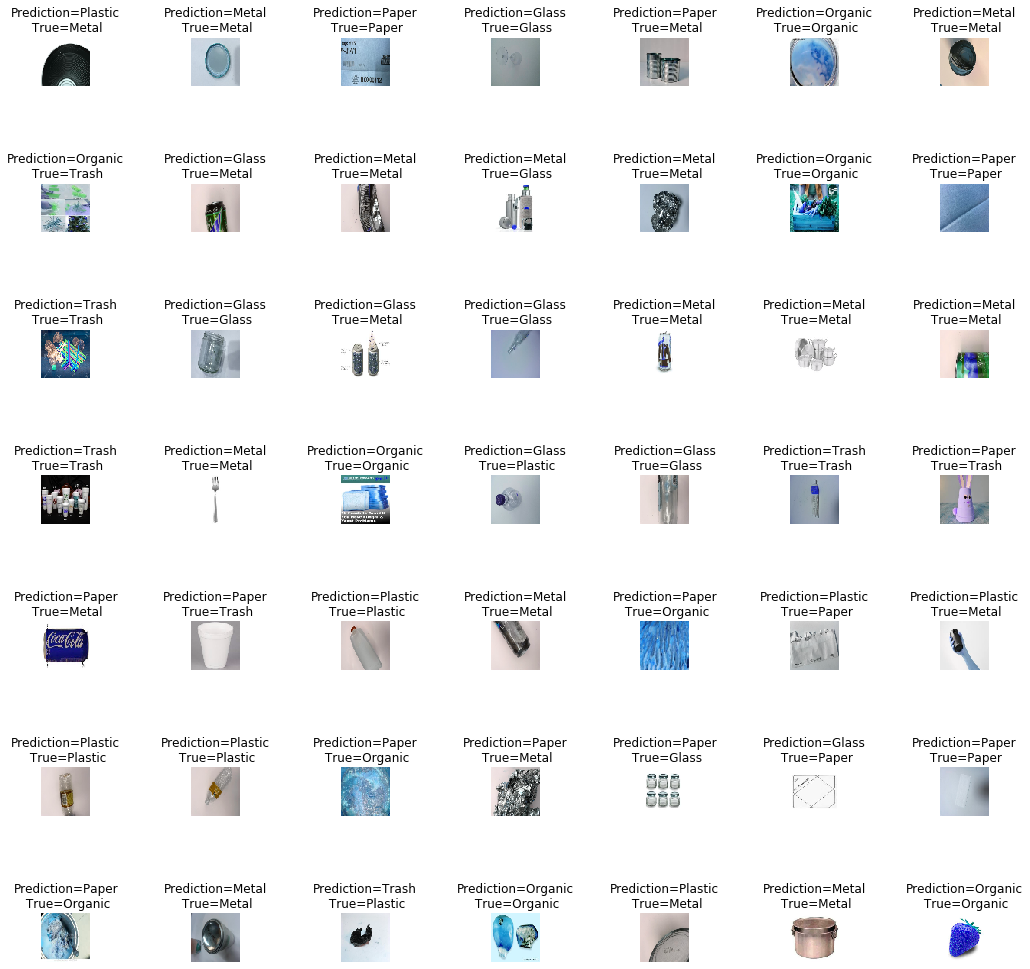

In [ ]:
L=7
W=7
fig,axes=plt.subplots(L,W,figsize=(17,17))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction={}\n True={}'.format(pred_class[i],y_class[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=2,hspace=2)

In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,predicted_class)
cm

array([[38,  6,  0,  8, 10,  3],
       [ 7, 62,  5, 13,  5,  8],
       [ 0,  4, 61,  8,  0,  2],
       [ 1,  2,  3, 92,  1,  4],
       [ 8,  0,  0,  9, 38,  2],
       [ 2,  8,  9,  6,  2, 34]], dtype=int64)

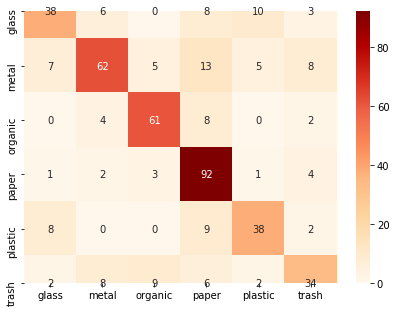

In [ ]:
import seaborn as sn

df_cm = pd.DataFrame(cm, index = categories,
                  columns = categories)
plt.figure(figsize = (7,5))
sn.heatmap(df_cm, annot=True,cmap="OrRd")

In [ ]:
corr=0
false=0
for i in range(len(y_test)):
    if y_test[i]==predicted_class[i]:
         corr=corr+1
    else:
        false=false+1
        
print("Correct:",corr)
print("False",false)

Correct: 325
False 136


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

NameError: name 'plt' is not defined

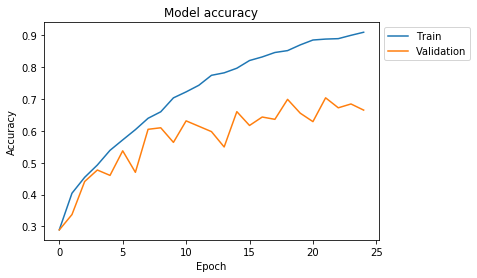

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()